# 🧩 Word Embeddings — From Words to Vectors

In natural language processing (NLP), a word embedding is a representation of a word. The embedding is used in text analysis. Typically, the representation is a real-valued vector that encodes the meaning of the word in such a way that the words that are closer in the vector space are expected to be similar in meaning.

---

## 1️⃣ What & Why — High-level Intuition

**Goal:** Represent each word $ w $ in a vocabulary $ V $ as a vector so that **semantic** and **syntactic** relationships between words are captured geometrically (e.g., similar words are close in space).

Two broad families of feature extraction techniques:

1. **Count / Frequency-based Representations**
   - **Bag of Words (BoW):** Counts of token occurrences.
   - **One-Hot Encoding:** A unique binary vector per token.
   - **TF–IDF:** Weighted frequency emphasizing informative terms.

2. **Neural / Deep Learning-based Representations**
   - **Word2Vec:** Learns dense word vectors by predicting context (CBOW) or target (Skip-Gram).

---

## 2️⃣ Conceptual Hierarchy of Word Embeddings

A clear hierarchical view showing the evolution of word embedding techniques — from frequency-based to deep learning-based models.

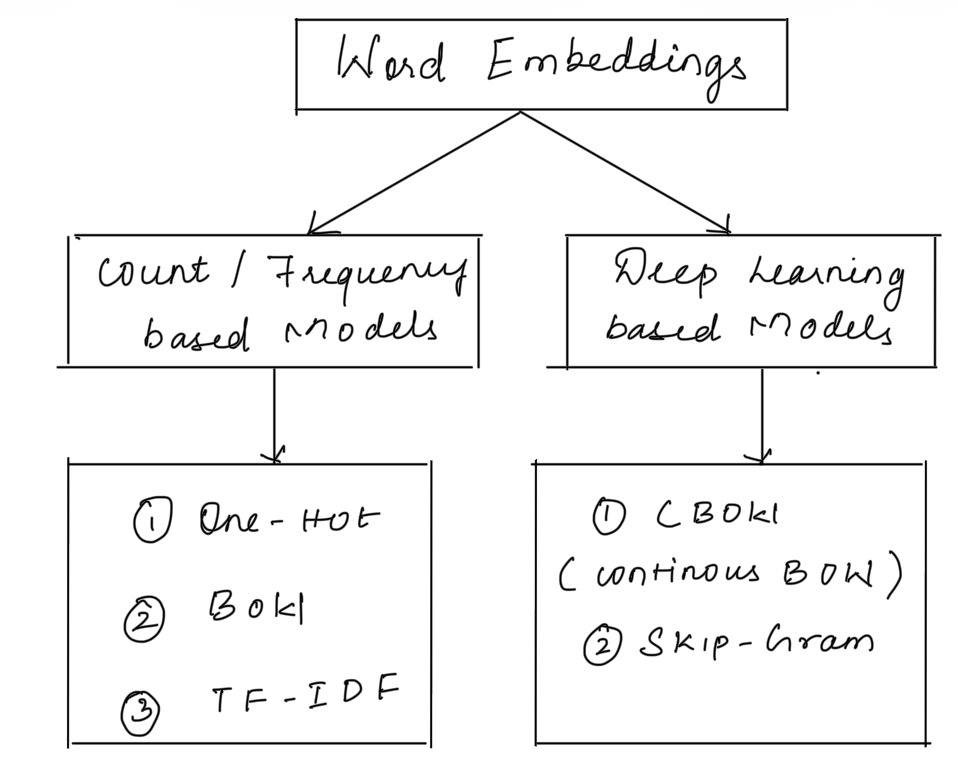


$$
\begin{array}{c}
\boxed{\Large \textbf{Word Embedding}} \\[10pt]

% Main outer arrows to both grouped boxes
\begin{array}{cc}
\swarrow & \searrow
\end{array}
\\[8pt]

% Two main grouped boxes side-by-side
\begin{array}{cc}

% ---------- LEFT GROUP ----------
\color{#2E8B57}{
\boxed{
\begin{array}{c}
\textbf{Count / Frequency-based Models} \\[8pt]
\Downarrow \\[6pt]
\boxed{\text{One-Hot}}
\;\longrightarrow\;
\boxed{\text{BoW}}
\;\longrightarrow\;
\boxed{\text{TF–IDF}}
\end{array}
}}

&
% ---------- RIGHT GROUP ----------
\color{#4682B4}{
\boxed{
\begin{array}{c}
\textbf{Deep Learning-based Models} \\[8pt]
\Downarrow \\[6pt]
\boxed{\text{Word2Vec}} \\[6pt]
\Downarrow \\[4pt]
\boxed{\text{CBOW (Continuous BoW)}} 
\;\longleftrightarrow\;
\boxed{\text{Skip-Gram}}
\end{array}
}}
\end{array}
\\[12pt]


% connecting label
\color{gray}{
\text{(Traditional statistical approaches} \;\;\longrightarrow\;\; \text{Learned neural representations)}
}
\end{array}
$$


---

### 🔍 Explanation

#### 🌿 **Count / Frequency-based Models**
| Model | Description |
|--------|--------------|
| **One-Hot** | Each word represented by a unique binary vector (no relation captured). |
| **BoW** | Counts word occurrences per document (order ignored). |
| **TF–IDF** | Weights terms by importance — downweights frequent but less informative words. |

➡️ These are **sparse**, **non-contextual**, and depend purely on frequency statistics.

---

#### 💠 **Deep Learning-based Models**
| Model | Description |
|--------|--------------|
| **Word2Vec** | Learns word embeddings using a shallow neural network. |
| **CBOW (Continuous BoW)** | Predicts a word from its context words. |
| **Skip-Gram** | Predicts context words from the center word. |

➡️ These are **dense**, **semantic**, and **context-aware** — capturing relationships like:  
$$
\text{king} - \text{man} + \text{woman} \approx \text{queen}
$$

---

### 🧩 Summary of the Evolution
1. **Start:** Discrete vectors → *(One-Hot)*  
2. **Add frequency context:** *(BoW)*  
3. **Add weighting for importance:** *(TF–IDF)*  
4. **Add learning and semantics:** *(Word2Vec)*  
5. **Add directionality/context modeling:** *(CBOW / Skip-Gram)*  

---

## 3️⃣ Formal Definitions

### 🔹 One-Hot Encoding
For vocabulary size $ |V| $, the one-hot vector for word $ w $ is defined as:

$$
\mathbf{x}_w \in \{0,1\}^{|V|}, \quad
(\mathbf{x}_w)_i =
\begin{cases}
1, & \text{if } i = \operatorname{index}(w) \\
0, & \text{otherwise}
\end{cases}
$$

- **Pros:** Simple, unambiguous.
- **Cons:** Extremely sparse; no similarity between words.

---

### 🔹 Bag-of-Words (BoW)
A document $ d $ is represented as a count vector:

$$
\mathbf{c}_d \in \mathbb{R}^{|V|}, \quad
(\mathbf{c}_d)_i = \text{count of token } v_i \text{ in } d.
$$

- **Pros:** Straightforward and effective for linear models.
- **Cons:** Ignores word order and context.

---

### 🔹 TF–IDF (Term Frequency – Inverse Document Frequency)
Weights terms based on their importance across documents:

$$
\operatorname{tfidf}(t, d) = \operatorname{tf}(t, d) \cdot \operatorname{idf}(t)
$$
$$
\operatorname{idf}(t) = \log\!\left( \frac{N}{1 + \operatorname{df}(t)} \right)
$$

where:
- $ N $: total number of documents  
- $ \operatorname{df}(t) $: number of documents containing term $ t $

**Common similarity metric:**

$$
\cos(\mathbf{a}, \mathbf{b}) = \frac{\mathbf{a}^\top \mathbf{b}}{\lVert \mathbf{a}\rVert_2 \lVert \mathbf{b}\rVert_2}
$$

- **Pros:** Reduces weight of common words.
- **Cons:** Sparse, still ignores semantic meaning.

---

### 🔹 Word2Vec (Learned Dense Embeddings)
Word2Vec learns dense vector representations through a neural network.

Each word $ w $ has:
- **Input vector:** $ \mathbf{v}_w $
- **Output vector:** $ \mathbf{u}_w $

---

#### 🟢 Skip-Gram Model
Predicts context words $ w_c $ from a center word $ w_t $:

$$
\max_\Theta \sum_{t} \sum_{w_c \in \mathcal{C}_t} 
\log p(w_c | w_t)
$$

$$
p(w_c | w_t) =
\frac{\exp(\mathbf{u}_{w_c}^{\top}\mathbf{v}_{w_t})}
{\sum_{w' \in V}\exp(\mathbf{u}_{w'}^{\top}\mathbf{v}_{w_t})}
$$

---

#### 🟣 Continuous Bag-of-Words (CBOW)
Predicts the target word from the average of its surrounding context words:

$$
\bar{\mathbf{v}}_{\mathcal{C}_t} =
\frac{1}{|\mathcal{C}_t|} \sum_{w_c \in \mathcal{C}_t} \mathbf{v}_{w_c}
$$

$$
\max_\Theta \sum_t \log p(w_t | \bar{\mathbf{v}}_{\mathcal{C}_t})
$$

---

#### ⚙️ Negative Sampling (Efficient Approximation)

$$
\mathcal{L}_{\text{NS}} =
- \Big[
\log \sigma(\mathbf{u}_{w_c}^{\top}\mathbf{v}_{w_t})
+ \sum_{i=1}^{k} \log \sigma(-\mathbf{u}_{w_i^{-}}^{\top}\mathbf{v}_{w_t})
\Big]
$$
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

- **Pros:** Dense, compact, captures analogies and semantics.  
- **Cons:** Needs training, one vector per word sense.

---

## 4️⃣ Conceptual Comparison (Feature Types)

| **Aspect** | **One-Hot** | **BoW** | **TF–IDF** | **Word2Vec (CBOW/SG)** |
|-------------|--------------|----------|-------------|---------------------------|
| **Dimensionality** | $ |V| $ | $ |V| $ | $ |V| $ | $ d \ll |V| $ |
| **Sparsity** | Very high | High | High | **Low (dense)** |
| **Context Awareness** | ✗ | ✗ | ✗ | **✓** |
| **Semantic Similarity** | ✗ | Limited | Limited | **✓✓✓** |
| **Training Needed** | No | No | No | **Yes** |
| **Order / Syntax** | ✗ | ✗ | ✗ | **Partial (via context window)** |

---

## 5️⃣ Mathematical Relationships (KaTeX Visuals)

**Cosine Similarity:**
$$
\text{similarity}(w_i, w_j) = 
\cos(\mathbf{e}_{w_i}, \mathbf{e}_{w_j}) =
\frac{\mathbf{e}_{w_i}^{\top}\mathbf{e}_{w_j}}
{\lVert \mathbf{e}_{w_i}\rVert_2 \lVert \mathbf{e}_{w_j}\rVert_2}
$$

**Analogy Relationship:**
$$
\mathbf{e}_{\text{king}} - \mathbf{e}_{\text{man}} + \mathbf{e}_{\text{woman}}
\approx \mathbf{e}_{\text{queen}}
$$

**Context Window ( $ m $) around token $ t $:**
$$
\mathcal{C}_t = \{ w_{t-m}, \ldots, w_{t-1}, w_{t+1}, \ldots, w_{t+m} \}
$$

---

## 6️⃣ Practical Notes

- Use **TF–IDF** for classical ML models (SVM, Logistic Regression) when interpretability matters.  
- Use **Word2Vec** for deep learning tasks requiring semantic understanding.  
- Hybrid approaches combine both:  
  $$
  \mathbf{v}_{\text{doc}} = [\text{TF–IDF} \; \| \; \text{Mean(Word2Vec)}]
  $$




# 🧩 Word Embeddings — From Words to Vectors (with Examples)

---

## 1️⃣ Understanding the Landscape

Word embeddings transform **words → numeric vectors**, enabling models to understand semantics and similarity.

Two major categories:

- **Count/Frequency-based Representations**
  - Represent text using counts or weighted frequencies.
- **Neural/Deep Learning-based Representations**
  - Learn continuous dense vectors using training objectives.

---

## 2️⃣ Step-by-Step Examples with Substituted Values

Let’s take a **toy corpus** of two simple sentences:

> 🗂️ Corpus:  
> D₁ = "I love dogs"  
> D₂ = "I love cats"

Vocabulary $ V = \{ \text{I}, \text{love}, \text{dogs}, \text{cats} \} \Rightarrow |V| = 4 $

---

### 🔹 Example 1 — One-Hot Encoding

Each word is represented as a binary vector of size $ |V| = 4 $.

$$
\begin{aligned}
\text{I}      &\rightarrow [1, 0, 0, 0] \\
\text{love}   &\rightarrow [0, 1, 0, 0] \\
\text{dogs}   &\rightarrow [0, 0, 1, 0] \\
\text{cats}   &\rightarrow [0, 0, 0, 1]
\end{aligned}
$$

Each position corresponds to a vocabulary index.
No relationship between “dogs” and “cats” is captured — they’re orthogonal.

---

### 🔹 Example 2 — Bag-of-Words (BoW)

Represent each document as counts over the vocabulary:

| Term  | I | love | dogs | cats |
|--------|---|------|------|------|
| D₁     | 1 | 1 | 1 | 0 |
| D₂     | 1 | 1 | 0 | 1 |

$$
\mathbf{c}_{D_1} = [1, 1, 1, 0], \quad
\mathbf{c}_{D_2} = [1, 1, 0, 1]
$$

---

### 🔹 Example 3 — TF–IDF Calculation (with substitution)

Compute TF–IDF weights for each word:

$$
\operatorname{tfidf}(t, d) = \operatorname{tf}(t, d) \times \operatorname{idf}(t)
$$
$$
\operatorname{idf}(t) = \log\!\left( \frac{N}{1 + \operatorname{df}(t)} \right)
$$

or 

$$
\boxed{
TFIDF_{ij} =
\left(
\frac{\text{Repeated words in sentence } i}{\text{Total words in sentence } i}
\right)
\times
\log_e
\left(
\frac{\text{Total sentences}}{\text{Sentences containing the word}}
\right)
}
$$

Where $ N = 2 $ (number of documents).

| Term | D₁ tf | D₂ tf | df(t) | idf(t) = log(2 / (1 + df)) |
|------|--------|--------|-------|-----------------------------|
| I | 1 | 1 | 2 | log(2 / 3) = -0.176 |
| love | 1 | 1 | 2 | log(2 / 3) = -0.176 |
| dogs | 1 | 0 | 1 | log(2 / 2) = 0 |
| cats | 0 | 1 | 1 | log(2 / 2) = 0 |

$$
\text{TF–IDF}(D_1) = [1 \times (-0.176), 1 \times (-0.176), 1 \times 0, 0 \times 0]
$$
$$
\text{TF–IDF}(D_2) = [1 \times (-0.176), 1 \times (-0.176), 0, 1 \times 0]
$$

Result (rounded):

$$
\mathbf{v}_{D_1} = [-0.18, -0.18, 0, 0], \quad
\mathbf{v}_{D_2} = [-0.18, -0.18, 0, 0]
$$

⚠️ Both documents look identical for “I love X” → TF–IDF can’t distinguish meaning (semantic gap).

---

### 🔹 Example 4 — Word2Vec (Conceptual Substitution)

**Idea:** Learn embedding vectors such that context predicts target (Skip-Gram) or vice versa (CBOW).

Let’s assume:
$$
\text{Sentence: "I love dogs"}
$$
and window size $ m = 1 $.

**Context windows:**

| Target | Context |
|---------|----------|
| I | [love] |
| love | [I, dogs] |
| dogs | [love] |

---

#### (a) Skip-Gram Objective Example

For pair $ (w_t = \text{love}, w_c = \text{dogs}) $:

$$
p(w_c | w_t) = \frac{\exp(\mathbf{u}_{w_c}^{\top}\mathbf{v}_{w_t})}
{\sum_{w' \in V} \exp(\mathbf{u}_{w'}^{\top}\mathbf{v}_{w_t})}
$$

Assume 2D embeddings:

$$
\mathbf{v}_{\text{love}} = [0.2, 0.8], \quad
\mathbf{u}_{\text{dogs}} = [0.3, 0.9]
$$

Then:

$$
\mathbf{u}_{\text{dogs}}^{\top}\mathbf{v}_{\text{love}} =
(0.3)(0.2) + (0.9)(0.8) = 0.06 + 0.72 = 0.78
$$

$$
p(\text{dogs}|\text{love}) \propto e^{0.78} = 2.18
$$

After normalization over the vocabulary, the probability of “dogs” appearing after “love” becomes high — exactly what we want semantically.

---

#### (b) CBOW Objective Example

Predict center word $ w_t = \text{love} $ from context [I, dogs]:

$$
\bar{\mathbf{v}}_{\mathcal{C}_t} =
\frac{\mathbf{v}_{\text{I}} + \mathbf{v}_{\text{dogs}}}{2}
$$

Assume:
$$
\mathbf{v}_{\text{I}} = [0.1, 0.2], \quad
\mathbf{v}_{\text{dogs}} = [0.3, 0.9]
$$

Then:

$$
\bar{\mathbf{v}}_{\mathcal{C}_t} = \frac{[0.1 + 0.3, 0.2 + 0.9]}{2} = [0.2, 0.55]
$$

The model then predicts the word “love” using this averaged context embedding.

---

## 4️⃣ Summary Table — Intuition and Representation

| **Aspect** | **One-Hot** | **BoW** | **TF–IDF** | **Word2Vec** |
|-------------|--------------|----------|-------------|---------------|
| **Representation** | Binary vector | Count vector | Weighted count | Learned dense vector |
| **Captures Context?** | ✗ | ✗ | ✗ | ✓ |
| **Handles Synonyms?** | ✗ | ✗ | ✗ | ✓ |
| **Dimensionality** | $ |V| $ | $ |V| $ | $ |V| $ | $ d \ll |V| $ |
| **Sparsity** | High | High | High | Low |
| **Example Dim (|V|=4)** | [1,0,0,0] | [1,1,1,0] | [-0.18,-0.18,0,0] | [0.2,0.8] |
| **Semantic Power** | ❌ | ⚪️ | ⚪️ | ✅✅✅ |

---

## 5️⃣ Takeaway

- **Count-based** methods rely on surface frequency — simple, interpretable, but lack meaning.  
- **Word2Vec** learns meaning from context — geometrically encoding relationships:
  $$
  \mathbf{e}_{\text{king}} - \mathbf{e}_{\text{man}} + \mathbf{e}_{\text{woman}}
  \approx \mathbf{e}_{\text{queen}}
  $$
- This allows downstream models to generalize better and understand analogy.

---


## 🧠 Semantic Vector Arithmetic in Word Embeddings

A remarkable property of learned word embeddings (especially Word2Vec) is that **semantic relationships** between words are encoded as **linear relationships in vector space**.

---

### 🔹 Example: The “King–Queen” Analogy

$$
\text{king} - \text{man} + \text{woman} \approx \text{queen}
$$

This expression is not symbolic — it’s **vector arithmetic** performed in the embedding space.

Each word (e.g., *king*, *man*, *woman*, *queen*) is represented by a **dense vector**:

$$
\mathbf{v}_{\text{king}}, \;
\mathbf{v}_{\text{man}}, \;
\mathbf{v}_{\text{woman}}, \;
\mathbf{v}_{\text{queen}} \in \mathbb{R}^d
$$

where $ d $ is typically 100–300 (the embedding dimension).

---

### 🔹 Mathematical Interpretation

We compute:

$$
\mathbf{v}_{\text{king}} - \mathbf{v}_{\text{man}} + \mathbf{v}_{\text{woman}}
$$

Then, we find the word vector in the vocabulary whose cosine similarity is **highest** with this result:

$$
\text{target} = \arg\max_{w \in V}
\cos\!\left( \mathbf{v}_w, \;
\mathbf{v}_{\text{king}} - \mathbf{v}_{\text{man}} + \mathbf{v}_{\text{woman}} \right)
$$

In a well-trained Word2Vec model,  
$$
\text{target} = \text{queen}.
$$

---

### 🔹 Intuitive Explanation

| Concept | Description |
|----------|--------------|
| **king – man** | Removes the *gender* component from “king”, leaving a vector representing “royal person”. |
| **+ woman** | Adds the *female* gender component back to that “royal person” vector. |
| **≈ queen** | The resulting vector points closest to the embedding for “queen”. |

---

### 🔹 Why This Works

Because Word2Vec learns embeddings based on **context prediction**, it organizes words in the vector space so that:
- **Syntactic and semantic relationships** are roughly **linear**.
- Dimensions implicitly encode **latent features** (e.g., gender, tense, plurality, royalty, profession).

So the model learns consistent transformations like:

$$
\text{Paris} - \text{France} + \text{Italy} \approx \text{Rome}
$$
$$
\text{walking} - \text{walk} + \text{swim} \approx \text{swimming}
$$

---

### 🧩 Takeaway

Word embeddings **don’t just memorize** — they **map meaning into geometry**.

This linearity allows analogical reasoning, clustering, and semantic search — forming the foundation for many **modern NLP and LLM architectures**.

---

✅ *In short, that single equation beautifully summarizes why embeddings revolutionized NLP — they turn linguistic meaning into algebraic structure.*



---
# 🧩 Word2Vec — Learning Word Meaning from Context

Word2Vec is a technique for Natual Language Processing (NLP) published in 2013 by Google. The Word2Vec algorithm uses a neural network model to learn word associations from a large corpus of text. Once trained, such a model can detect synonymous words or suggest additional words for a partial sentence. As the name implies, Word2Vec represents each distinc word with a particular list of numbers called a vector

---

## 1️⃣ Intuition Behind Word2Vec

Traditional approaches like **BoW** and **TF–IDF** treat words as independent tokens, ignoring the **context** in which words appear.  
This means:

- “dog” and “cat” are unrelated numerically, even though they occur in similar contexts.  
- Models trained on these features cannot understand semantic similarity.

**Word2Vec** changes that.  
It learns **dense vector representations** such that **words appearing in similar contexts have similar vectors**.

---

## 2️⃣ Core Idea

Instead of counting words, Word2Vec **predicts relationships** between words.

It uses a **neural network** trained on a large corpus to **predict**:
- A target word given its context (**CBOW model**), or  
- Context words given a target word (**Skip-Gram model**).

---

## 3️⃣ Context Window

Given a sequence of words:  
$$
w_{1}, w_{2}, w_{3}, \ldots, w_{T}
$$
and a window size $ m $, the **context** of a word $ w_{t} $ is:

$$
\mathcal{C}_{t} = \{w_{t-m}, \ldots, w_{t-1}, w_{t+1}, \ldots, w_{t+m}\}
$$

Example (with $ m = 2 $):

> Sentence: “The dog chased the cat”  
> For target “chased”: context = {The, dog, the, cat}

---

## 4️⃣ Skip-Gram Model

The **Skip-Gram** model predicts each context word $ w_{c} $ from the center (target) word $ w_{t} $.

### Objective Function

$$
\max_{\Theta} \sum_{t=1}^{T} \sum_{w_{c} \in \mathcal{C}_{t}} 
\log P(w_{c} | w_{t})
$$

where  
$$
P(w_{c} | w_{t}) =
\frac{\exp\!\left(\mathbf{u}_{w_{c}}^{\top} \mathbf{v}_{w_{t}}\right)}
{\sum_{w' \in V} \exp\!\left(\mathbf{u}_{w'}^{\top} \mathbf{v}_{w_{t}}\right)}
$$

- $ \mathbf{v}_{w_{t}} $: input (center) word vector  
- $ \mathbf{u}_{w_{c}} $: output (context) word vector  
- $ V $: vocabulary  

**Goal:** make the dot product large for true (center, context) pairs, small otherwise.

---

## 5️⃣ CBOW (Continuous Bag-of-Words)

The **CBOW** model does the inverse: predicts the target word from its context.

### Objective Function

$$
\max_{\Theta} \sum_{t=1}^{T} \log P(w_{t} | \mathcal{C}_{t})
$$

where  
$$
P(w_{t} | \mathcal{C}_{t}) =
\frac{\exp\!\left(\mathbf{u}_{w_{t}}^{\top} \bar{\mathbf{v}}_{\mathcal{C}_{t}}\right)}
{\sum_{w' \in V} \exp\!\left(\mathbf{u}_{w'}^{\top} \bar{\mathbf{v}}_{\mathcal{C}_{t}}\right)}
$$

and the **context vector average** is:

$$
\bar{\mathbf{v}}_{\mathcal{C}_{t}} =
\frac{1}{|\mathcal{C}_{t}|} \sum_{w_{c} \in \mathcal{C}_{t}} \mathbf{v}_{w_{c}}
$$

---

## 6️⃣ Computational Challenge

The denominator (softmax) requires summing over **all words in the vocabulary**,  
which is computationally expensive ($ O(|V|)$) for large corpora.

To address this, two approximations are commonly used:

### a) Negative Sampling

Replace the full softmax with binary classification against sampled “negative” words.

$$
\mathcal{L}_{\text{NS}} =
- \left[
\log \sigma(\mathbf{u}_{w_c}^{\top}\mathbf{v}_{w_t})
+ \sum_{i=1}^{k} \log \sigma(-\mathbf{u}_{w_i^-}^{\top}\mathbf{v}_{w_t})
\right]
$$

where:
- $ \sigma(x) = \frac{1}{1 + e^{-x}} $
- $ k $: number of negative samples  
- $ w_i^- $: randomly chosen negative words

This simplifies training and speeds up convergence.

---

### b) Hierarchical Softmax

Uses a **binary tree** to represent the vocabulary.  
Each leaf node corresponds to a word, and each internal node represents a binary decision.  
This reduces complexity from $ O(|V|) $ to $ O(\log |V|) $.

---

## 7️⃣ Intuitive Interpretation

In the learned vector space:

- **Similar words** appear **close together**  
- **Analogical relationships** become **linear transformations**

$$
\mathbf{v}_{\text{king}} - \mathbf{v}_{\text{man}} + \mathbf{v}_{\text{woman}} \approx \mathbf{v}_{\text{queen}}
$$

- **king → queen** parallels **man → woman**
- Dimensions implicitly capture latent properties (gender, tense, plurality, etc.)

---

## 8️⃣ Geometric Intuition

| Relationship | Interpretation in Vector Space |
|---------------|-------------------------------|
| “good” → “better” | direction of intensity |
| “Paris” → “France” | country relation |
| “Tokyo” → “Japan” | analogous direction to Paris–France |
| “walking” → “walked” | past-tense relation |

Thus, **semantic and syntactic relations** are represented by **consistent vector offsets**.

---

## 9️⃣ Summary

| Aspect | CBOW | Skip-Gram |
|--------|-------|------------|
| **Goal** | Predict target from context | Predict context from target |
| **Training speed** | Faster | Slower |
| **Performance on rare words** | Weaker | Stronger |
| **Computation** | Averages context vectors | Trains on multiple context pairs |
| **Ideal for** | Frequent words | Sparse vocabularies |

---

🧩 *Word2Vec represents a paradigm shift: instead of counting words, it learns meaning from their co-occurrence patterns — translating linguistic relationships into geometry.*



---

## 🔠 Vocabulary and Feature Representations in Word2Vec

---

### 🔹 Concept

In **Word2Vec**, every **unique word** in the corpus (i.e., each vocabulary entry) is represented as a **dense vector**  
$$
\mathbf{v}_w \in \mathbb{R}^d
$$
where:
- $ w $ = a word in the vocabulary $ V $
- $ d $ = embedding dimension (e.g., 100, 200, 300)
- $ \mathbf{v}_w $ = learned vector representation (features) for word $ w $

So the vocabulary acts like a **feature dictionary**,  
and each word corresponds to one **feature vector** capturing its meaning.

---

### 🔹 Example Corpus

> “I love dogs”, “I love cats”

Vocabulary:  
$$
V = \{\text{I}, \text{love}, \text{dogs}, \text{cats}\}
$$
Let embedding dimension $ d = 3 $.

Initially (before training), Word2Vec assigns **random vectors**:
$$
\mathbf{v}_{\text{I}} = [0.1, 0.3, -0.2], \quad
\mathbf{v}_{\text{love}} = [0.5, -0.1, 0.3], \quad
\mathbf{v}_{\text{dogs}} = [-0.2, 0.4, 0.1], \quad
\mathbf{v}_{\text{cats}} = [0.0, 0.2, 0.4]
$$

During training, these vectors are **updated** based on context relationships.

---

### 🔹 Substitution in Skip-Gram Formula

For a context pair $ (w_t = \text{love}, w_c = \text{dogs}) $:

$$
P(w_c | w_t) =
\frac{\exp(\mathbf{u}_{w_c}^{\top}\mathbf{v}_{w_t})}
{\sum_{w' \in V} \exp(\mathbf{u}_{w'}^{\top}\mathbf{v}_{w_t})}
$$

Now substitute values:

$$
\mathbf{v}_{\text{love}} = [0.5, -0.1, 0.3], \quad
\mathbf{u}_{\text{dogs}} = [-0.2, 0.4, 0.1]
$$

Compute dot product:
$$
\mathbf{u}_{\text{dogs}}^{\top}\mathbf{v}_{\text{love}} =
(-0.2)(0.5) + (0.4)(-0.1) + (0.1)(0.3) = -0.1 - 0.04 + 0.03 = -0.11
$$

Then:
$$
\exp(-0.11) = 0.895
$$

Assume denominator (sum over all words) = 3.50

$$
P(\text{dogs} | \text{love}) = \frac{0.895}{3.50} = 0.256
$$

---

### 🔹 Interpretation

- This probability shows how likely **“dogs”** is to appear in the **context** of **“love”**.  
- As training proceeds, vectors adjust to **increase** this probability for true context pairs (like *love–dogs*) and **decrease** it for unrelated ones (like *love–chair*).

---

### 🔹 Intuitive Takeaway

- Each word in the vocabulary $ V $ is a **point in vector space**.  
- Training Word2Vec moves these points so that **semantic neighbors cluster together**:
  $$
  \text{similar words} \;\;\Rightarrow\;\; \text{closer vectors (higher cosine similarity)}.
  $$

| Word | Initial Vector (Random) | Learned Vector (After Training) |
|------|--------------------------|---------------------------------|
| I | [0.1, 0.3, -0.2] | [0.05, 0.28, -0.15] |
| love | [0.5, -0.1, 0.3] | [0.45, 0.05, 0.38] |
| dogs | [-0.2, 0.4, 0.1] | [-0.15, 0.42, 0.22] |
| cats | [0.0, 0.2, 0.4] | [-0.02, 0.25, 0.35] |

Now, “dogs” and “cats” will be **close together** in vector space — both share the *animal* context with “love”.

---

🧩 *Thus, in Word2Vec, each vocabulary entry is a learned feature representation that encodes contextual meaning — transforming discrete tokens into continuous features.*
